# Flight Price Prediction

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [74]:
train_df= pd.read_excel(r"Data_Train.xlsx")

In [75]:
train_df.shape

(10683, 11)

In [76]:
pd.set_option("display.max_columns", None)

In [77]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [78]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
Airline            10683 non-null object
Date_of_Journey    10683 non-null object
Source             10683 non-null object
Destination        10683 non-null object
Route              10682 non-null object
Dep_Time           10683 non-null object
Arrival_Time       10683 non-null object
Duration           10683 non-null object
Total_Stops        10682 non-null object
Additional_Info    10683 non-null object
Price              10683 non-null int64
dtypes: int64(1), object(10)
memory usage: 500.8+ KB


In [79]:
train_df["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [80]:
train_df["Duration"].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
3h         261
2h 20m     238
2h 30m     220
2h 40m     158
1h 25m     135
2h 15m     135
2h 25m      98
13h 30m     97
13h 20m     89
3h 15m      88
7h 30m      86
9h 30m      85
8h 40m      81
7h 15m      79
3h 5m       78
5h 30m      72
7h 35m      71
8h          68
7h 5m       65
9h          64
9h 50m      64
5h          63
5h 15m      62
11h         62
11h 45m     62
          ... 
27h 30m      1
47h          1
40h 20m      1
33h 20m      1
41h 20m      1
3h 25m       1
4h 10m       1
29h 30m      1
13h 35m      1
28h 30m      1
37h 10m      1
36h 25m      1
30h 10m      1
30h 25m      1
31h 30m      1
33h 45m      1
35h 20m      1
32h 20m      1
35h 35m      1
47h 40m      1
19h 50m      1
29h 40m      1
29h 10m      1
27h 55m      1
42h 5m       1
30h 15m      1
32h 55m      1
5m           1
31h 50m      1
42h 45m      1
Name: Duration, Length: 368, dtype: int64

In [81]:
train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [82]:
train_df.dropna(inplace=True)

In [83]:
train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

## EDA

In [84]:
# We have to work on date of journey to create date and month seperate.
# We will use pandas to_datetime

In [85]:
train_df["Journey_day"]=pd.to_datetime(train_df["Date_of_Journey"], format="%d/%m/%Y").dt.day
train_df["Journey_month"]=pd.to_datetime(train_df["Date_of_Journey"], format="%d/%m/%Y").dt.month

In [86]:
train_df["Journey_day"].value_counts()

9     1406
6     1287
27    1130
21    1111
1     1075
24    1052
15     984
12     957
3      848
18     832
Name: Journey_day, dtype: int64

In [87]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [88]:
# Drop date of journey

train_df.drop(['Date_of_Journey'], axis=1 , inplace=True)

In [89]:
train_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [90]:
train_df["Additional_Info"].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
Red-eye flight                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

In [91]:
train_df["Dep_hour"]=pd.to_datetime(train_df["Dep_Time"]).dt.hour
train_df["Dep_min"]=pd.to_datetime(train_df["Dep_Time"]).dt.minute

In [92]:
train_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [93]:
# Drop date of journey

train_df.drop(['Dep_Time'], axis=1 , inplace=True)

In [94]:
train_df["Arrival_hour"]=pd.to_datetime(train_df["Arrival_Time"]).dt.hour
train_df["Arrival_min"]=pd.to_datetime(train_df["Arrival_Time"]).dt.minute

train_df.drop(['Arrival_Time'], axis=1 , inplace=True)

In [95]:
train_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [96]:
# Working through the duration field


duration=list(train_df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if "h" in duration[i]:
            duration[i]= duration[i].strip() + " 0m"
        else:
            duration[i]= "0h " + duration[i]
            
duration_hours=[]
duration_mins=[]

for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep='h')[0]))
    duration_mins.append(int(duration[i].split(sep='m')[0].split()[-1]))

In [97]:
train_df["Duration_hours"]=duration_hours

In [98]:
train_df["Duration_mins"]=duration_mins

In [99]:
train_df.drop(["Duration"], axis=1, inplace=True)

In [100]:
train_df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


# handle categorical data

In [101]:
train_df["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [102]:
Airline= pd.get_dummies(train_df[["Airline"]], drop_first=True)

In [103]:
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [104]:
train_df["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [105]:
source= pd.get_dummies(train_df[["Source"]], drop_first=True)

In [106]:
source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [107]:
#Destination

destination= pd.get_dummies(train_df[["Destination"]], drop_first=True)

In [108]:
info.head()

,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0


In [109]:
train_df["Route"].value_counts()

DEL → BOM → COK                      2376
BLR → DEL                            1552
CCU → BOM → BLR                       979
CCU → BLR                             724
BOM → HYD                             621
CCU → DEL → BLR                       565
BLR → BOM → DEL                       402
MAA → CCU                             381
DEL → HYD → COK                       326
DEL → JAI → BOM → COK                 240
DEL → BLR → COK                       232
DEL → COK                             213
DEL → AMD → BOM → COK                 205
DEL → MAA → COK                       146
DEL → IDR → BOM → COK                  99
DEL → HYD → MAA → COK                  83
DEL → NAG → BOM → COK                  71
CCU → MAA → BLR                        65
DEL → GOI → BOM → COK                  58
DEL → HYD → BOM → COK                  56
CCU → HYD → BLR                        53
CCU → BBI → BLR                        50
DEL → BHO → BOM → COK                  50
CCU → IXR → DEL → BLR             

In [110]:
# Route and additional info can be dropped

train_df.drop(["Route","Additional_Info"], axis=1, inplace=True)

In [112]:
train_df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


In [113]:
train_df["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [115]:
# It is a ordinal field so have to consider order too

train_df.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4}, inplace=True)

In [116]:
train_df["Total_Stops"].value_counts()

1    5625
0    3491
2    1520
3      45
4       1
Name: Total_Stops, dtype: int64

In [117]:
train_df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [118]:
train_df=pd.concat([train_df,Airline,source,destination], axis=1)

In [119]:
train_df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [122]:
train_df.drop(["Airline","Source","Destination"], axis=1, inplace=True)

In [123]:
train_df.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [124]:
train_df.shape

(10682, 30)

## Test Set

In [125]:
test_df=pd.read_excel(r"Test_set.xlsx")

In [126]:
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [127]:
test_df.drop(["Route","Additional_Info"], axis=1, inplace=True)

In [128]:
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops
0,Jet Airways,6/06/2019,Delhi,Cochin,17:30,04:25 07 Jun,10h 55m,1 stop
1,IndiGo,12/05/2019,Kolkata,Banglore,06:20,10:20,4h,1 stop
2,Jet Airways,21/05/2019,Delhi,Cochin,19:15,19:00 22 May,23h 45m,1 stop
3,Multiple carriers,21/05/2019,Delhi,Cochin,08:00,21:00,13h,1 stop
4,Air Asia,24/06/2019,Banglore,Delhi,23:55,02:45 25 Jun,2h 50m,non-stop


In [130]:
t_airline= pd.get_dummies(test_df["Airline"], drop_first=True)
t_Source= pd.get_dummies(test_df["Source"], drop_first=True)
t_Destination= pd.get_dummies(test_df["Destination"], drop_first=True)

In [131]:
test_df=pd.concat([test_df,t_airline,t_Source,t_Destination], axis=1)

In [132]:
test_df.drop(["Airline","Source","Destination"], axis=1,inplace=True)

In [133]:
test_df.head()

,Date_of_Journey,Dep_Time,Arrival_Time,Duration,Total_Stops,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,6/06/2019,17:30,04:25 07 Jun,10h 55m,1 stop,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,12/05/2019,06:20,10:20,4h,1 stop,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,21/05/2019,19:15,19:00 22 May,23h 45m,1 stop,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,21/05/2019,08:00,21:00,13h,1 stop,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,24/06/2019,23:55,02:45 25 Jun,2h 50m,non-stop,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [135]:
test_df.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4}, inplace=True)

In [136]:
test_df.head()

,Date_of_Journey,Dep_Time,Arrival_Time,Duration,Total_Stops,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,6/06/2019,17:30,04:25 07 Jun,10h 55m,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,12/05/2019,06:20,10:20,4h,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,21/05/2019,19:15,19:00 22 May,23h 45m,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,21/05/2019,08:00,21:00,13h,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,24/06/2019,23:55,02:45 25 Jun,2h 50m,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [137]:
# Working through the duration field


duration=list(test_df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if "h" in duration[i]:
            duration[i]= duration[i].strip() + " 0m"
        else:
            duration[i]= "0h " + duration[i]
            
duration_hours=[]
duration_mins=[]

for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep='h')[0]))
    duration_mins.append(int(duration[i].split(sep='m')[0].split()[-1]))
    
test_df["Duration_hours"]=duration_hours
test_df["Duration_mins"]=duration_mins
test_df.drop(["Duration"], axis=1, inplace=True)

In [138]:
test_df.head()

,Date_of_Journey,Dep_Time,Arrival_Time,Total_Stops,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Duration_hours,Duration_mins
0,6/06/2019,17:30,04:25 07 Jun,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,10,55
1,12/05/2019,06:20,10:20,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,4,0
2,21/05/2019,19:15,19:00 22 May,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,23,45
3,21/05/2019,08:00,21:00,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,13,0
4,24/06/2019,23:55,02:45 25 Jun,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,50


In [140]:
test_df["Arrival_hour"]=pd.to_datetime(test_df["Arrival_Time"]).dt.hour
test_df["Arrival_min"]=pd.to_datetime(test_df["Arrival_Time"]).dt.minute

test_df.drop(['Arrival_Time'], axis=1 , inplace=True)

test_df["Dep_hour"]=pd.to_datetime(test_df["Dep_Time"]).dt.hour
test_df["Dep_min"]=pd.to_datetime(test_df["Dep_Time"]).dt.minute

test_df.drop(['Dep_Time'], axis=1 , inplace=True)

In [141]:
test_df.head()

,Date_of_Journey,Total_Stops,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Duration_hours,Duration_mins,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,6/06/2019,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,10,55,4,25,17,30
1,12/05/2019,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,4,0,10,20,6,20
2,21/05/2019,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,23,45,19,0,19,15
3,21/05/2019,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,13,0,21,0,8,0
4,24/06/2019,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,50,2,45,23,55


In [142]:
test_df["Journey_day"]=pd.to_datetime(test_df["Date_of_Journey"], format="%d/%m/%Y").dt.day
test_df["Journey_month"]=pd.to_datetime(test_df["Date_of_Journey"], format="%d/%m/%Y").dt.month

test_df.drop(["Date_of_Journey"], axis=1, inplace=True)

In [143]:
test_df.shape

(2671, 28)

In [144]:
test_df.head()

,Total_Stops,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Duration_hours,Duration_mins,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Journey_day,Journey_month
0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,10,55,4,25,17,30,6,6
1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,4,0,10,20,6,20,12,5
2,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,23,45,19,0,19,15,21,5
3,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,13,0,21,0,8,0,21,5
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,50,2,45,23,55,24,6


# Feature Selection

In [145]:
train_df.shape

(10682, 30)

In [146]:
test_df.shape

(2671, 28)

In [149]:
train_df.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [151]:
X= train_df.loc[:,['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]

In [152]:
y= train_df.iloc[:,1]

In [153]:
X.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [154]:
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

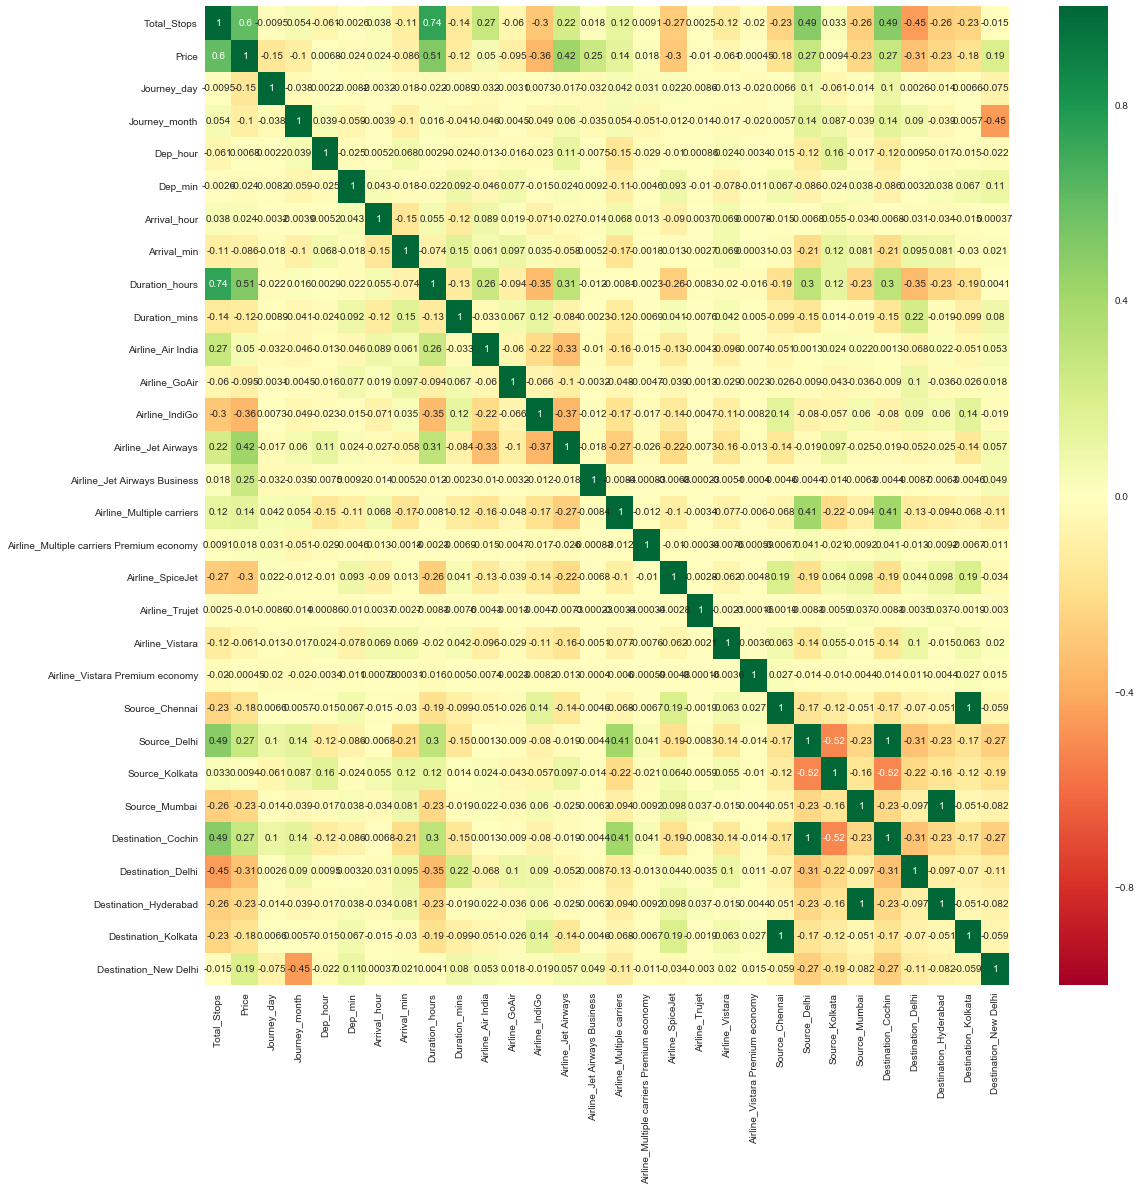

In [156]:
plt.figure(figsize=(18,18))

sns.heatmap(train_df.corr(), annot=True, cmap="RdYlGn")

In [157]:
# Important features using extra tree regressor

from sklearn.ensemble import ExtraTreesRegressor
selection =ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_split=1e-07, min_samples_leaf=1,
          min_samples_split=2, min_weight_fraction_leaf=0.0,
          n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
          verbose=0, warm_start=False)

In [158]:
print(selection.feature_importances_)

[  1.72267530e-01   1.46200559e-01   5.27765259e-02   2.43762220e-02
   2.20842352e-02   2.50750599e-02   1.98789939e-02   1.66164935e-01
   1.71741457e-02   7.17704462e-03   1.81105314e-03   1.56824620e-02
   1.48108964e-01   7.01910959e-02   1.84688482e-02   9.92845231e-04
   2.15074486e-03   5.41442109e-05   4.34859456e-03   5.99463950e-05
   3.72189093e-04   1.02337358e-02   3.14009304e-03   9.65042757e-03
   8.65259288e-03   2.11838549e-02   6.63464836e-03   5.64355640e-04
   2.45241530e-02]


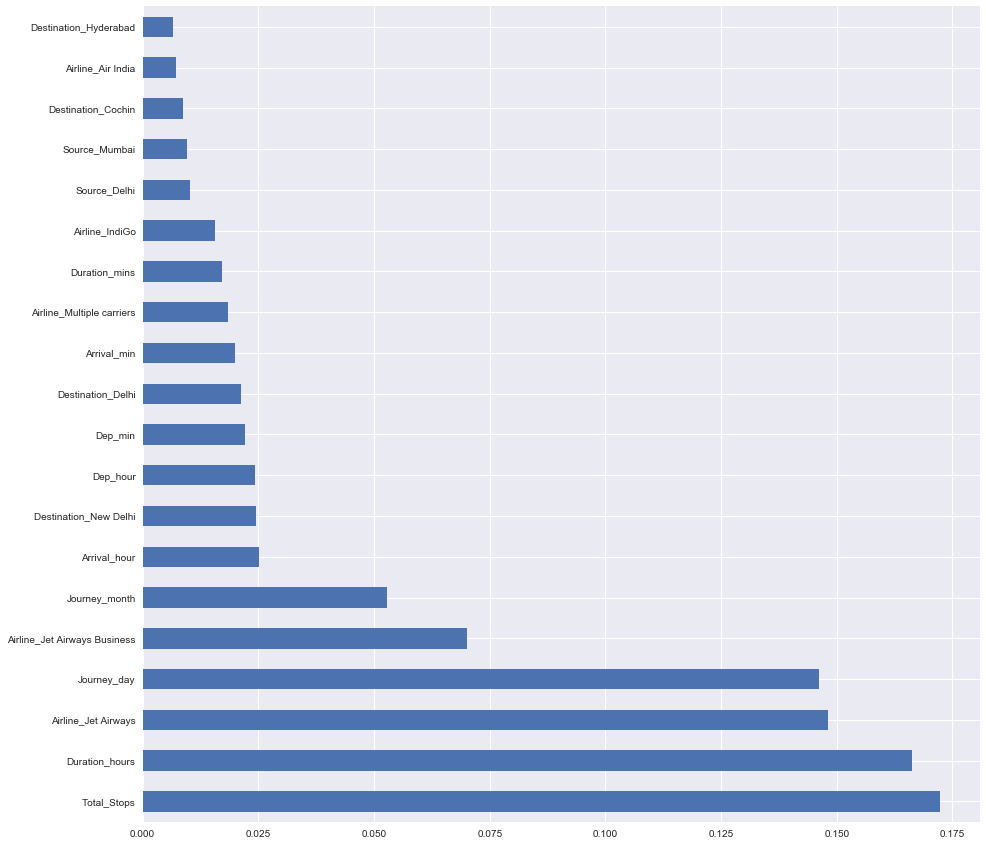

In [159]:
plt.figure(figsize=(15,15))

feat_imp=pd.Series(selection.feature_importances_, index=X.columns)

feat_imp.nlargest(20).plot(kind='barh')
plt.show()

# Fitting model using random forest

In [163]:
# train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=.2, random_state=5)

In [164]:
from sklearn.ensemble import RandomForestRegressor
reg_rf=RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [170]:
y_pred=reg_rf.predict(X_test)

In [172]:
reg_rf.score(X_test, y_test)

0.80510037237794407

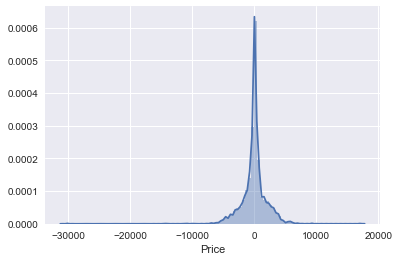

In [168]:
sns.distplot(y_pred-y_test, bins=100)

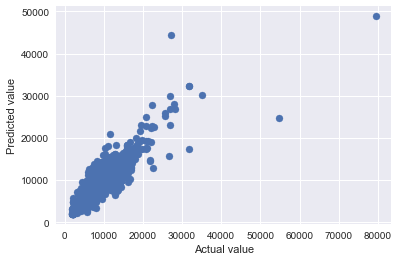

In [175]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual value")
plt.ylabel("Predicted value")

In [176]:
from sklearn import metrics

In [179]:
print("MAE:", metrics.mean_absolute_error(y_test,y_pred))
print("MSE:", metrics.mean_squared_error(y_test,y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 1231.50822844
MSE: 4437565.28489
RMSE: 2106.55293902


In [180]:
metrics.r2_score(y_test,y_pred)

0.80510037237794407

# Hyper parameter Tuning

In [182]:
from sklearn.model_selection import RandomizedSearchCV

In [183]:
#estimator, param_distributions, n_iter=10, scoring=None, fit_params=None, n_jobs=1, iid=True, refit=True, cv=None, 
#verbose=0, pre_dispatch='2*n_jobs', random_state=None, error_score='raise', return_train_score=True

n_estimators=[100,200,300,400,500,600,700,800,900,1000,1100,1200]
max_features=['auto','sqrt']
max_depth=[5,10,15,20,25,30]
min_samples_split=[2,5,10,15,100]
min_samples_leaf=[1,2,5,10]

In [184]:
random_grid={"n_estimators":n_estimators,
            "max_features": max_features,
            "max_depth" : max_depth,
            "min_samples_split" : min_samples_split,
            "min_samples_leaf" : min_samples_leaf}

In [185]:
rf_random=RandomizedSearchCV(estimator=reg_rf, param_distributions=random_grid, verbose=2, n_iter=10, n_jobs=1, random_state=5, cv=5, scoring="neg_mean_squared_error")

In [186]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=25 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=25, total=  10.5s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=25 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.4s remaining:    0.0s


[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=25, total=   9.1s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=25 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=25, total=  10.0s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=25 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=25, total=  11.2s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=25 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=25, total=   8.2s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=20, total=   6.5s
[CV] n_estimators=1000, min_sample

[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   6.4s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   6.4s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   6.4s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   6.4s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   6.2s
[CV] n_estimators=700, min_samples_split=5,

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  8.8min finished


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
          fit_params={}, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]},
          pre_dispatch='2*n_jobs', random_state=5, refit=True,
          return_train_score=True, scoring='neg_mean_squared_error',
          verbose=2)

In [187]:
rf_random.best_params_

{'max_depth': 15,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 100}

In [188]:
pred=rf_random.predict(X_test)

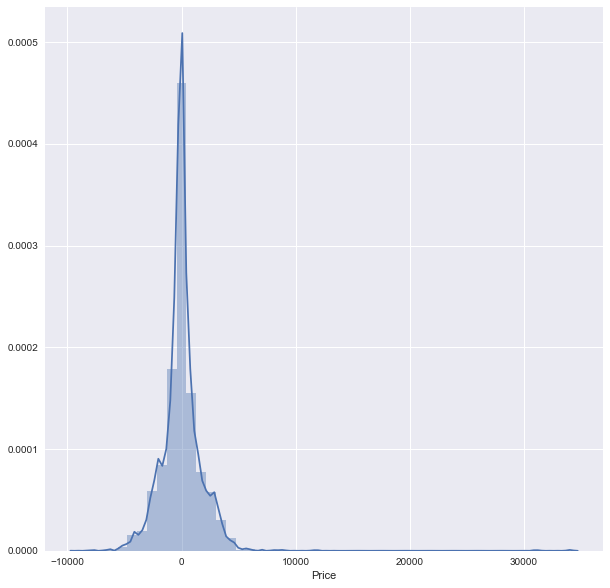

In [190]:
plt.figure(figsize=(10,10))
sns.distplot(y_test-pred)
plt.show()

In [191]:
print("MAE:", metrics.mean_absolute_error(y_test,pred))
print("MSE:", metrics.mean_squared_error(y_test,pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test,pred)))

MAE: 1123.59013349
MSE: 3622308.38706
RMSE: 1903.23629302


In [192]:
metrics.r2_score(y_test,pred)

0.84090677872962005

# Save the model to reuse again

In [194]:
import pickle

file=open("flight_rf.pkl", "wb")

pickle.dump(rf_random, file)

In [195]:
model= open("flight_rf.pkl", "rb")

In [196]:
forest=pickle.load(model)

In [197]:
y_pred2=forest.predict(X_test)

In [198]:
metrics.r2_score(y_test, y_pred2)

0.84090677872962005